## 1. Import libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 

import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from pypair.association import binary_binary
from pypair.util import corr
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import plotly.graph_objects as go


## 2. Load Dataset

In [2]:
data=pd.read_csv('CSV_Syndemics_Nov2023.csv')

## 3. Perform EDA on dataset

In [3]:
data=data.rename(columns={ "PAT_ID" : "pat_id","AGE" : "age","SEX":"sex", "RACE":"race", "HISPANIC":'hispanic',
                     "PRIMARY_CARE_VISIT_COUNT":"pcv_count", "Acute Myocardial Infarction":"acute_myocardial_infarction",
                     "Alzheimer’s Disease":"alzheimers","Anemia":"anemia","Asthma":"asthma",
                     "Atrial Fibrillation and Flutter":"atrial_ff", "Benign Prostatic Hyperplasia":"bph",
                     "Cancer, Breast":"cancer_b","Cancer, Colorectal":"cancer_c","Cancer, Endometrial":"cancer_e",
                     "Cancer, Lung":"cancer_l","Cancer, Prostate":"cancer_p","Cancer, Urologic":"cancer_u",
                     "Cataract":"cataract","Chronic Kidney Disease":"ckd","Chronic Obstructive Pulmonary Disease":"copd",
                     "Depression, Bipolar, or Other Depressive Mood Disorders":"mood_disorder","Diabetes":"diabetes",
                     "Glaucoma":"glaucoma","Heart Failure and Non-Ischemic Heart Disease":"heart_failure_non-ischemic",
                     "Hip/Pelvic Fracture":"hip_pelvic_fracture", "Hyperlipidemia":"hypterlipidemia","Hypertension":"hyptertension",
                     "Hypothyroidism":"hypothyroidism", "Ischemic Heart Disease":"ihd",
                     "Non-Alzheimer’s Dementia":"dementia","Osteoporosis With or Without Pathological Fracture":"osteoporosis",
                     "Parkinson’s Disease and Secondary Parkinsonism":"parkinsons", "Pneumonia, All-cause":"penumonia",
                     "Rheumatoid Arthritis/Osteoarthritis":"arthritis", "Stroke/Transient Ischemic Attack":"stroke", 
                          "Insurance":"insurance"})


### a. Check Null values

In [4]:
data.isnull().sum()

pat_id                         0
age                            0
sex                            1
race                           0
hispanic                       0
pcv_count                      0
acute_myocardial_infarction    0
alzheimers                     0
anemia                         0
asthma                         0
atrial_ff                      0
bph                            0
cancer_b                       0
cancer_c                       0
cancer_e                       0
cancer_l                       0
cancer_p                       0
cancer_u                       0
cataract                       0
ckd                            0
copd                           0
mood_disorder                  0
diabetes                       0
glaucoma                       0
heart_failure_non-ischemic     0
hip_pelvic_fracture            0
hypterlipidemia                0
hyptertension                  0
hypothyroidism                 0
ihd                            0
dementia  

In [5]:
data.dropna(axis=0,inplace=True)
data.shape

(93994, 37)

### b. Remove pad_id column

In [6]:
data=data.drop(['pat_id'], axis=1)
data.shape

(93994, 36)

### c. Determine the data types of the column and create dummy columns for the cetagorical featues

In [7]:
data.dtypes

age                             int64
sex                            object
race                           object
hispanic                       object
pcv_count                       int64
acute_myocardial_infarction     int64
alzheimers                      int64
anemia                          int64
asthma                          int64
atrial_ff                       int64
bph                             int64
cancer_b                        int64
cancer_c                        int64
cancer_e                        int64
cancer_l                        int64
cancer_p                        int64
cancer_u                        int64
cataract                        int64
ckd                             int64
copd                            int64
mood_disorder                   int64
diabetes                        int64
glaucoma                        int64
heart_failure_non-ischemic      int64
hip_pelvic_fracture             int64
hypterlipidemia                 int64
hyptertensio

In [8]:
data=pd.get_dummies(data,dtype=int)

Created dummies for sex - sex_F & sex_M
Create dummies for race:
race_1: american indian or alaska native, race_2: asian, race_3: black or african american, race_4: native hawaiian or other, race_5: white, race_7: refuse to answer, race_NI: no information, race_OT: other, race_UN: unknown
Created dummies for hispanic - hispanic_N: no, hispanic_NI: no information, hispanic_R: ?, hispanic_Y: yes

In [9]:
data.head()

,age,pcv_count,acute_myocardial_infarction,alzheimers,anemia,asthma,atrial_ff,bph,cancer_b,cancer_c,cancer_e,cancer_l,cancer_p,cancer_u,cataract,ckd,copd,mood_disorder,diabetes,glaucoma,heart_failure_non-ischemic,hip_pelvic_fracture,hypterlipidemia,hyptertension,hypothyroidism,ihd,dementia,osteoporosis,parkinsons,penumonia,arthritis,stroke,insurance,sex_F,sex_M,race_1,race_2,race_3,race_4,race_5,race_7,race_NI,race_OT,race_UN,hispanic_N,hispanic_NI,hispanic_R,hispanic_Y
0,35,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,76,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,27,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


### d. Descriptive dataset analysis

In [10]:
#descriptive statistics of variables
data.describe(include='all')

,age,pcv_count,acute_myocardial_infarction,alzheimers,anemia,asthma,atrial_ff,bph,cancer_b,cancer_c,cancer_e,cancer_l,cancer_p,cancer_u,cataract,ckd,copd,mood_disorder,diabetes,glaucoma,heart_failure_non-ischemic,hip_pelvic_fracture,hypterlipidemia,hyptertension,hypothyroidism,ihd,dementia,osteoporosis,parkinsons,penumonia,arthritis,stroke,insurance,sex_F,sex_M,race_1,race_2,race_3,race_4,race_5,race_7,race_NI,race_OT,race_UN,hispanic_N,hispanic_NI,hispanic_R,hispanic_Y
count,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000,93994.000000
mean,51.162425,8.391695,0.006703,0.006224,0.180235,0.123582,0.039577,0.047503,0.027119,0.007905,0.003990,0.007171,0.015139,0.004532,0.035417,0.088335,0.069175,0.252888,0.194917,0.022661,0.046705,0.008256,0.459391,0.476711,0.109667,0.069430,0.012043,0.050982,0.006032,0.027438,0.170649,0.017831,0.631945,0.616688,0.383312,0.004064,0.043854,0.345086,0.001341,0.447603,0.009798,0.000840,0.142690,0.004724,0.811350,0.001851,0.009639,0.177160
std,17.223182,8.657639,0.081595,0.078646,0.384385,0.329106,0.194964,0.212713,0.162430,0.088557,0.063038,0.084376,0.122107,0.067169,0.184833,0.283784,0.253752,0.434670,0.396139,0.148821,0.211008,0.090486,0.498351,0.499460,0.312475,0.254185,0.109080,0.219962,0.077434,0.163357,0.376204,0.132337,0.482279,0.486196,0.486196,0.063621,0.204771,0.475399,0.036589,0.497250,0.098502,0.028979,0.349758,0.068567,0.391233,0.042986,0.097704,0.381806
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,52.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,64.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,104.000000,194.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

### e. Aggregating counts of diseases

In [11]:
sums = data.sum(axis=0, numeric_only=True)
(sums/93994)

age                            51.162425
pcv_count                       8.391695
acute_myocardial_infarction     0.006703
alzheimers                      0.006224
anemia                          0.180235
asthma                          0.123582
atrial_ff                       0.039577
bph                             0.047503
cancer_b                        0.027119
cancer_c                        0.007905
cancer_e                        0.003990
cancer_l                        0.007171
cancer_p                        0.015139
cancer_u                        0.004532
cataract                        0.035417
ckd                             0.088335
copd                            0.069175
mood_disorder                   0.252888
diabetes                        0.194917
glaucoma                        0.022661
heart_failure_non-ischemic      0.046705
hip_pelvic_fracture             0.008256
hypterlipidemia                 0.459391
hyptertension                   0.476711
hypothyroidism  

### f. getting counts & percentages

In [12]:
data.filter(regex='race_\d+').value_counts()
data.filter(regex='race_\d+').value_counts(normalize=True)*100

race_1  race_2  race_3  race_4  race_5  race_7
0       0       0       0       1       0         44.760304
                1       0       0       0         34.508586
                0       0       0       0         14.825414
        1       0       0       0       0          4.385386
        0       0       0       0       1          0.979850
1       0       0       0       0       0          0.406409
0       0       0       1       0       0          0.134051
Name: proportion, dtype: float64

In [13]:
data.filter(regex='hispanic_.+').value_counts()
data.filter(regex='hispanic_.+').value_counts(normalize=True)*100

hispanic_N  hispanic_NI  hispanic_R  hispanic_Y
1           0            0           0             81.134966
0           0            0           1             17.716024
                         1           0              0.963891
            1            0           0              0.185118
Name: proportion, dtype: float64

### g. Lets plot the distribution between age and primary care counts

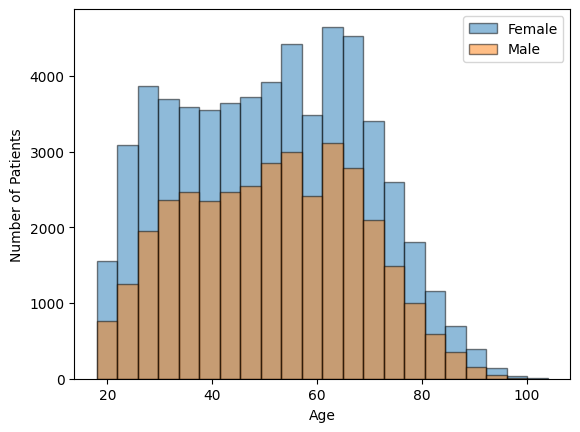

In [14]:
# creating a histogram for age 
plt.hist(data[data['sex_F'] == 1]['age'], bins=22, range=(data['age'].min(), data['age'].max()), edgecolor="black", alpha=0.5, label='Female')
plt.hist(data[data['sex_M'] == 1]['age'], bins=22, range=(data['age'].min(), data['age'].max()), edgecolor="black", alpha=0.5, label='Male')
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend()
plt.show()

### h. Finding  Outliers with IQR

In [15]:
#outliers using IQR
Q1 = data['pcv_count'].quantile(0.25)
Q3 = data['pcv_count'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = data[(data['pcv_count'] < Q1 - threshold * IQR) | (data['pcv_count'] > Q3 + threshold * IQR)]
outliers

,age,pcv_count,acute_myocardial_infarction,alzheimers,anemia,asthma,atrial_ff,bph,cancer_b,cancer_c,cancer_e,cancer_l,cancer_p,cancer_u,cataract,ckd,copd,mood_disorder,diabetes,glaucoma,heart_failure_non-ischemic,hip_pelvic_fracture,hypterlipidemia,hyptertension,hypothyroidism,ihd,dementia,osteoporosis,parkinsons,penumonia,arthritis,stroke,insurance,sex_F,sex_M,race_1,race_2,race_3,race_4,race_5,race_7,race_NI,race_OT,race_UN,hispanic_N,hispanic_NI,hispanic_R,hispanic_Y
12,90,30,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
39,56,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
40,36,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
42,62,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
67,34,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93934,69,41,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
93952,57,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
93975,30,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
93979,88,27,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


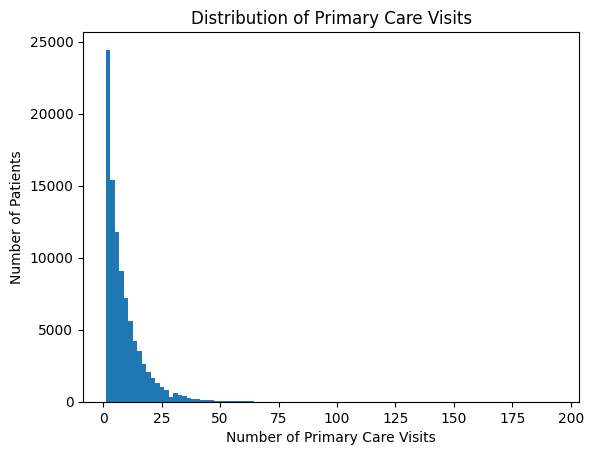

In [16]:
# creating a histogram for primary care visit
plt.hist(data['pcv_count'], bins = 100) 
plt.xlabel("Number of Primary Care Visits")
plt.ylabel("Number of Patients")
plt.title("Distribution of Primary Care Visits")
plt.show() 

### i. Remove outliers

In [17]:
#drop outliers & verify
data_noOutliers = data.drop(outliers.index)
data_noOutliers.describe()

,age,pcv_count,acute_myocardial_infarction,alzheimers,anemia,asthma,atrial_ff,bph,cancer_b,cancer_c,cancer_e,cancer_l,cancer_p,cancer_u,cataract,ckd,copd,mood_disorder,diabetes,glaucoma,heart_failure_non-ischemic,hip_pelvic_fracture,hypterlipidemia,hyptertension,hypothyroidism,ihd,dementia,osteoporosis,parkinsons,penumonia,arthritis,stroke,insurance,sex_F,sex_M,race_1,race_2,race_3,race_4,race_5,race_7,race_NI,race_OT,race_UN,hispanic_N,hispanic_NI,hispanic_R,hispanic_Y
count,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.00000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.00000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000,88957.000000
mean,50.731129,6.944423,0.006025,0.005812,0.167294,0.118507,0.035804,0.044909,0.025833,0.007476,0.003665,0.006700,0.014501,0.004058,0.030453,0.078780,0.06076,0.241611,0.180166,0.019830,0.040705,0.007127,0.445361,0.459166,0.107839,0.062952,0.011140,0.046753,0.005643,0.02382,0.153467,0.015794,0.618805,0.610329,0.389671,0.003968,0.045494,0.333554,0.001315,0.457457,0.010162,0.000888,0.142249,0.004912,0.812662,0.001956,0.010005,0.175377
std,17.231030,5.722068,0.077390,0.076014,0.373241,0.323209,0.185802,0.207106,0.158637,0.086138,0.060426,0.081579,0.119546,0.063575,0.171831,0.269396,0.23889,0.428062,0.384328,0.139416,0.197607,0.084121,0.497008,0.498333,0.310178,0.242878,0.104958,0.211110,0.074909,0.15249,0.360439,0.124679,0.485683,0.487678,0.487678,0.062869,0.208386,0.471485,0.036243,0.498190,0.100295,0.029787,0.349307,0.069917,0.390185,0.044184,0.099523,0.380291
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,51.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,64.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,104.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1

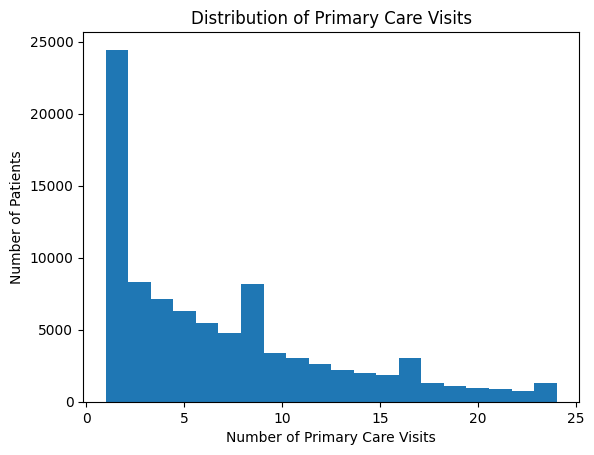

In [18]:
plt.hist(data_noOutliers['pcv_count'], bins = 20) 
plt.xlabel("Number of Primary Care Visits")
plt.ylabel("Number of Patients")
plt.title("Distribution of Primary Care Visits")
plt.show() 

### j. Discretizing Age

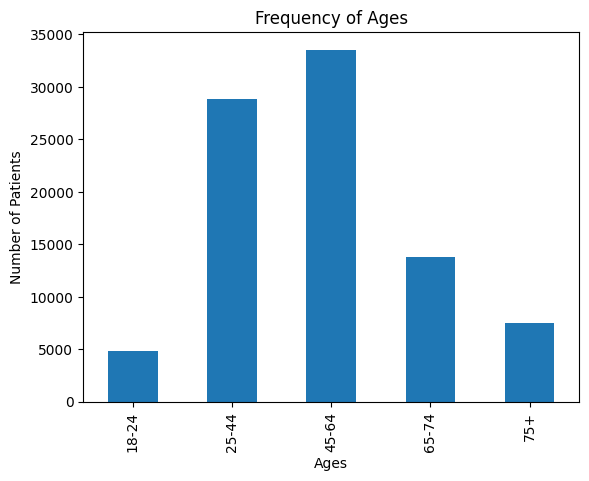

In [19]:
data_noOutliers['ages']=pd.cut(data_noOutliers['age'], 
       bins = [18,24,44,64,74,104],
      labels = ['18-24','25-44','45-64','65-74','75+'])

order = ['18-24','25-44','45-64','65-74','75+']

data_noOutliers['ages'].value_counts().loc[order].plot(kind='bar')
plt.xlabel("Ages")
plt.ylabel("Number of Patients")
plt.title("Frequency of Ages")


plt.show()

### k. Creating Dummy Vars for Age Buckets

In [20]:
data_noOutliers=pd.get_dummies(data_noOutliers)
data_noOutliers

,age,pcv_count,acute_myocardial_infarction,alzheimers,anemia,asthma,atrial_ff,bph,cancer_b,cancer_c,cancer_e,cancer_l,cancer_p,cancer_u,cataract,ckd,copd,mood_disorder,diabetes,glaucoma,heart_failure_non-ischemic,hip_pelvic_fracture,hypterlipidemia,hyptertension,hypothyroidism,ihd,dementia,osteoporosis,parkinsons,penumonia,arthritis,stroke,insurance,sex_F,sex_M,race_1,race_2,race_3,race_4,race_5,race_7,race_NI,race_OT,race_UN,hispanic_N,hispanic_NI,hispanic_R,hispanic_Y,ages_18-24,ages_25-44,ages_45-64,ages_65-74,ages_75+
0,35,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,False,True,False,False,False
1,76,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,False,False,False,False,True
2,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,False,False,True,False,False
3,27,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,False,True,False,False,False
4,69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93990,60,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,False,False,True,False,False
93991,60,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,False,False,True,False,False
93992,26,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,False,True,False,False,False
93993,30,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,False,True,False,False,False


### l. Determining correlation between binary features

Yule's coefficient of association (Y) is defined as the difference between the cross-product of the frequencies of concordant and discordant pairs of observations, divided by the total number of pairs. It is calculated using the following formula:

Y= (ad+bc) /(ad−bc)

Where:
a = number of concordant pairs (both variables are either positive or negative)
b = number of discordant pairs (one variable is positive, and the other is negative)
c = number of pairs where the first variable is positive and the second variable is negative
d = number of pairs where the first variable is negative and the second variable is positive

Yule's coefficient of association ranges from -1 to 1:

If Y = 1, there is a perfect positive association between the variables.
If Y = -1, there is a perfect negative association between the variables.
If Y = 0, there is no association between the variables.

In [21]:
subset=data_noOutliers.iloc[:,3:33]
#calculating correlation using yule's q coefficient
yule = lambda a, b: binary_binary(a, b, measure='yule_q')

yule_corr = corr(subset, yule)

yule_corr

,alzheimers,anemia,asthma,atrial_ff,bph,cancer_b,cancer_c,cancer_e,cancer_l,cancer_p,cancer_u,cataract,ckd,copd,mood_disorder,diabetes,glaucoma,heart_failure_non-ischemic,hip_pelvic_fracture,hypterlipidemia,hyptertension,hypothyroidism,ihd,dementia,osteoporosis,parkinsons,penumonia,arthritis,stroke,insurance
alzheimers,1.359938e-311,3.280344e-01,-4.715307e-01,6.042439e-01,4.593227e-01,2.946731e-01,6.219025e-01,0.523895,0.560296,0.504750,3.116934e-01,4.567553e-01,0.521342,0.190601,-0.108275,0.333619,0.464684,0.476391,0.616041,0.310183,0.553244,0.166791,0.487435,0.998699,0.645988,0.642988,0.063648,0.352485,0.451853,-0.037287
anemia,3.280344e-01,1.359939e-311,-1.044876e-01,3.194426e-01,3.340375e-02,6.333640e-02,3.549747e-01,0.225444,0.208325,0.133490,2.777510e-01,2.334616e-01,0.482870,0.081653,-0.144700,0.143624,0.191883,0.470053,0.280819,-0.105133,0.096953,0.009872,0.271285,0.331728,0.176005,0.213425,0.225785,0.089706,0.201907,0.207458
asthma,-4.715307e-01,-1.044876e-01,1.359939e-311,-3.343016e-01,-4.493006e-01,-1.746346e-01,-4.438542e-01,0.133295,-0.437739,-0.557994,-2.526676e-01,-2.148930e-01,-0.348184,0.121282,-0.080432,-0.261464,-0.200748,-0.199932,-0.204431,-0.366739,-0.377537,-0.190503,-0.326986,-0.517862,-0.277545,-0.550301,0.127136,-0.187340,-0.367999,0.064901
atrial_ff,6.042439e-01,3.194426e-01,-3.343016e-01,1.359939e-311,5.222762e-01,1.912572e-01,4.192174e-01,0.160408,0.544251,0.454160,4.607810e-01,4.027566e-01,0.660272,0.421783,-0.296767,0.342485,0.345460,0.872920,0.506483,0.227156,0.570045,0.156195,0.685907,0.628098,0.367322,0.388913,0.431702,0.300220,0.501743,0.115168
bph,4.593227e-01,3.340375e-02,-4.493006e-01,5.222762e-01,1.359939e-311,-9.303746e-01,3.066396e-01,-0.878336,0.322356,0.585277,5.312174e-01,4.784420e-01,0.424927,0.242259,-0.328191,0.221208,0.332413,0.333659,0.150434,0.456545,0.369438,-0.190230,0.583913,0.432861,-0.332914,0.668506,0.194992,0.290976,0.314715,0.130462
cancer_b,2.946731e-01,6.333640e-02,-1.746346e-01,1.912572e-01,-9.303746e-01,1.359939e-311,3.813233e-01,0.531563,0.317897,-0.891079,1.265124e-01,3.447435e-01,0.090578,0.129719,-0.120885,0.106775,0.236901,0.218779,0.253299,0.237282,0.250654,0.200957,0.134903,0.080919,0.601311,0.193561,0.113302,0.226392,0.195517,0.358739
cancer_c,6.219025e-01,3.549747e-01,-4.438542e-01,4.192174e-01,3.066396e-01,3.813233e-01,1.359939e-311,0.345779,0.551692,0.438472,5.008944e-01,3.662591e-01,0.403941,0.244650,-0.310980,0.230739,0.431110,0.305431,0.553123,0.099639,0.336264,0.045880,0.396152,0.470081,0.414067,0.230851,0.286906,0.115778,0.179071,0.126110
cancer_e,5.238952e-01,2.254438e-01,1.332951e-01,1.604077e-01,-8.783365e-01,5.315629e-01,3.457788e-01,0.000000,0.529256,-0.657146,5.044183e-01,3.493438e-01,0.265008,0.181862,-0.126735,0.346467,0.485348,0.094550,0.555890,0.199472,0.366817,0.335986,0.057768,0.474232,0.469040,-0.302247,0.218125,0.325713,-0.448348,0.232837
cancer_l,5.602964e-01,2.083254e-01,-4.377389e-01,5.442510e-01,3.223563e-01,3.178969e-01,5.516921e-01,0.529256,0.000000,0.499901,6.482232e-01,3.173068e-01,0.444656,0.775330,-0.257083,0.169233,0.211912,0.474389,0.449134,0.086665,0.327850,0.244639,0.586427,0.492931,0.494670,0.083972,0.560333,0.131037,0.448981,0.170532
cancer_p,5.047498e-01,1.334903e-01,-5.579940e-01,4.541600e-01,5.852775e-01,-8.910793e-01,4.384720e-01,-0.657146,0.499901,0.000000,6.596272e-01,4.117068e-01,0.513500,0.299376,-0.474716,0.206625,0.405738,0.376283,0.331140,0.426215,0.494573,-0.156923,0.601598,0.517218,-0.265420,0.533291,0.051369,0.136407,0.196690,0.124149


C:\Users\shilp\anaconda3_new\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


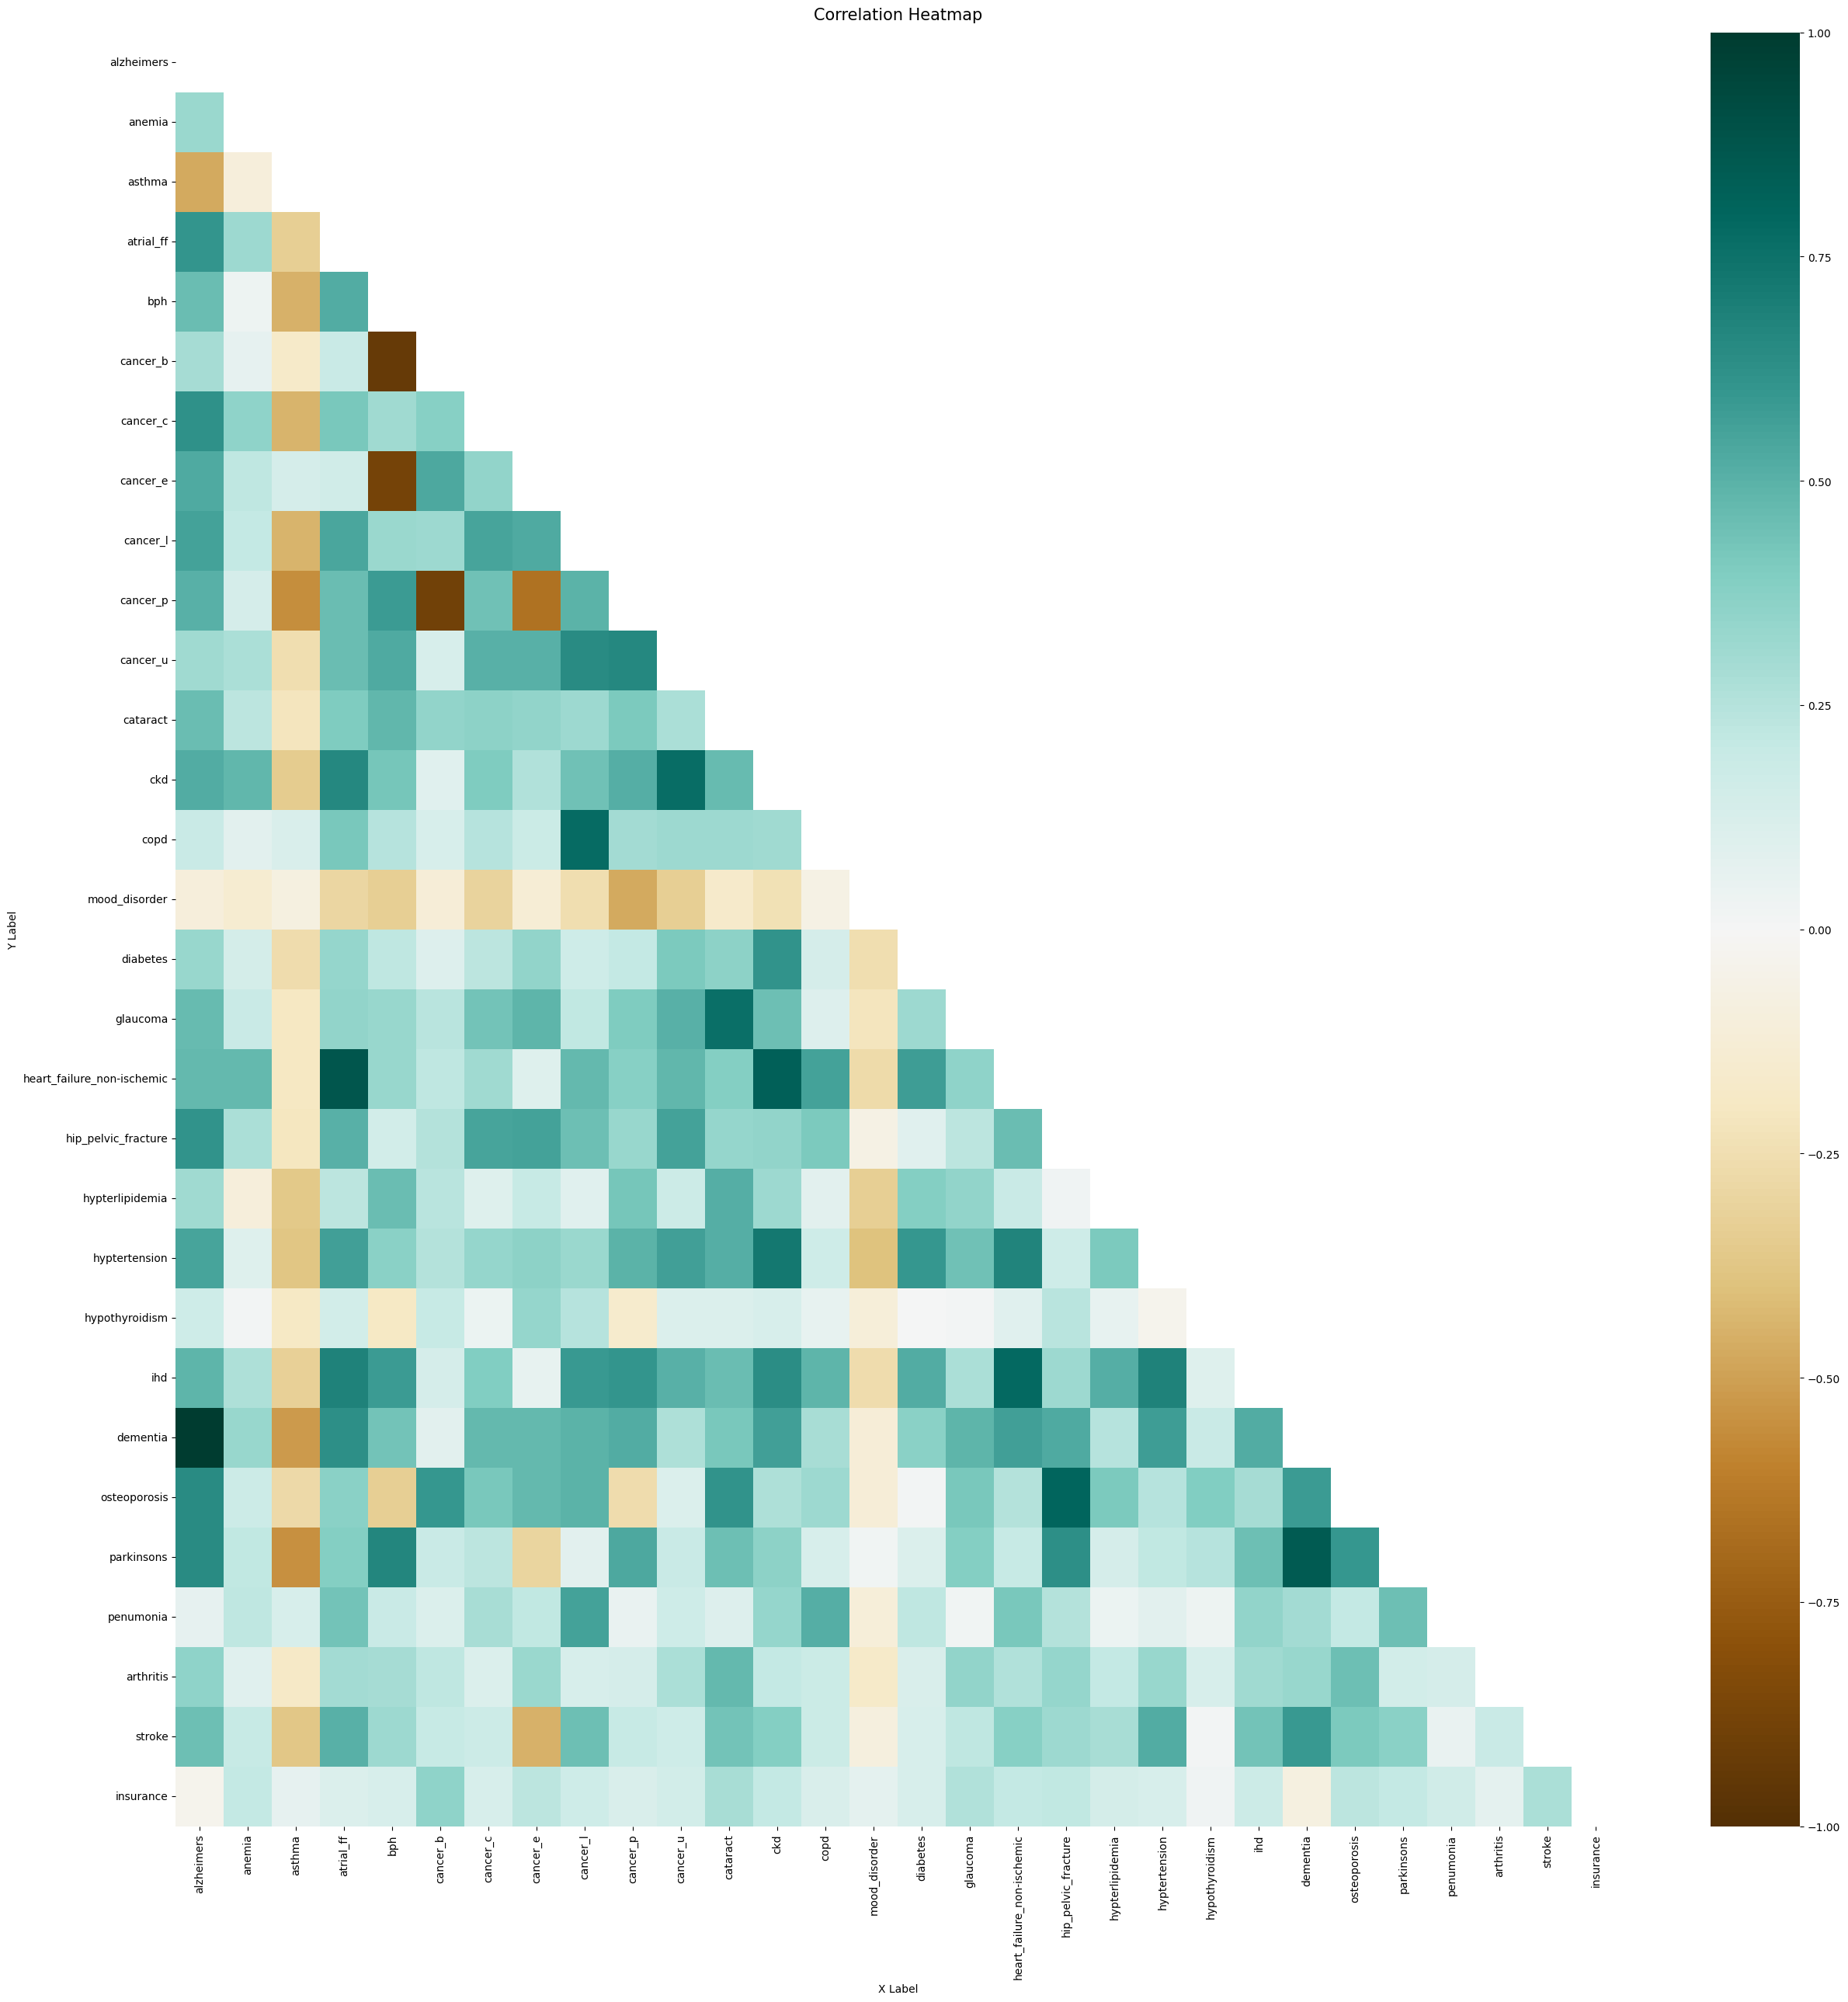

In [22]:
plt.figure(figsize=(30, 30))

mask = np.triu(np.ones_like(yule_corr))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(yule_corr, vmin=-1, vmax=1, annot=True, cmap="BrBG", mask=mask)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)

# Title and axis labels
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 15}, pad=12)
plt.xlabel('X Label')
plt.ylabel('Y Label')

plt.show()


## 4. Apply KMeans to dataset with no outliers

In [35]:
SquaredDistance=[]
Number_Of_Clusters=[]
for i in range(10,100):
    Number_Of_Clusters.append(i)
    kmeans=KMeans(n_clusters=i,random_state=0, n_init="auto").fit(data_noOutliers)
    SquaredDistance.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

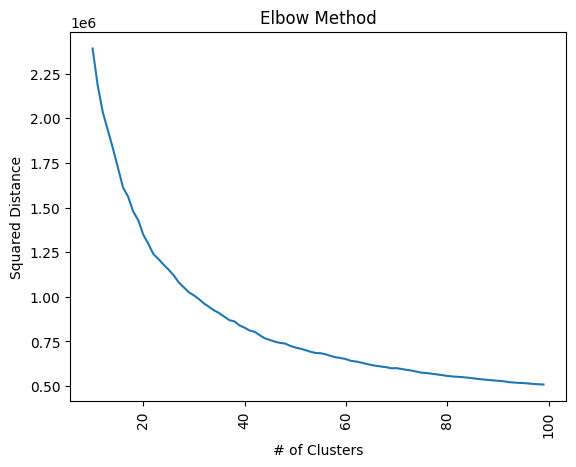

In [36]:
# plot the elbow graph

plt.plot(Number_Of_Clusters,SquaredDistance)
plt.xlabel('# of Clusters')
plt.ylabel('Squared Distance')
plt.xticks(rotation=90)
plt.title('Elbow Method')


### a. Execute KMeans with # of clusters determined by the Elbow graph

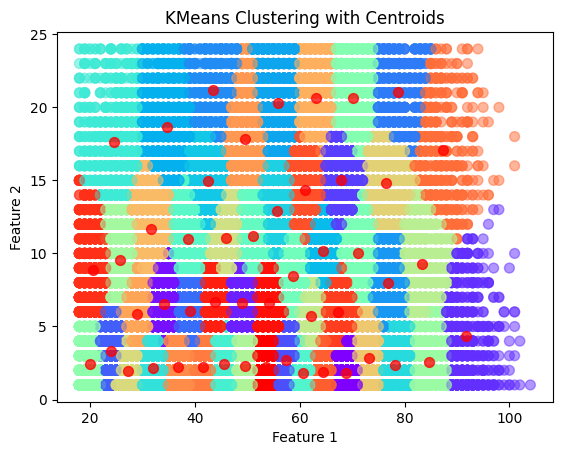

In [53]:
kmeans = KMeans(n_clusters = 50, init = 'k-means++', random_state = 0)
clusters = kmeans.fit_predict(data_noOutliers)

# Plotting the clusters
plt.scatter(data_noOutliers.iloc[:, 0], data_noOutliers.iloc[:, 1], c=clusters, cmap='rainbow', s=50, alpha=0.5)

# Plotting the centroids of the clusters with different colors
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75) 

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with Centroids')

plt.show()